In [1]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# VEST NC 2020

## VEST's Documentation File

Election results and precinct shapefile from the NC State Board of Elections (https://www.ncsbe.gov/results-data)

Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

North Carolina produces two sets of election results data. The precinct results are the unaltered results as initially reported by the counties. Many counties report early votes by vote center while provisional and other nonstandard ballots may be reported countywide. The precinct-sorted results are then produced within 30 days after the election. In the precinct-sorted data nearly all votes are assigned to precincts regardless of the manner by which the ballots were cast. However, North Carolina law requires the addition of statistical "noise" to the precinct-sorted data wherever any given vote by any specific voter may otherwise be deduced via cross referencing the various election-related data sets produced by the SBE.

For the 2020 general election 51 counties reported all votes by precinct in their initial precinct results. The precinct-sorted data set was used instead for the counties listed below.

Alleghany, Avery, Beaufort, Bertie\*, Bladen, Buncombe, Cabarrus, Caldwell, Camden, Currituck, Dare, Davidson\*, Davie, Duplin\*, Durham\*, Edgecombe, Guilford, Halifax\*, Harnett, Haywood, Henderson, Hertford, Hyde, Johnston, Jones, Lee, Lincoln, Macon, Martin, Mecklenburg\*, Moore, Nash, New Hanover\*, Northampton\*, Orange, Pasquotank, Pitt\*, Polk, Richmond, Scotland, Stokes\*, Surry\*, Tyrrell\*, Wake, Washington, Watauga, Wayne, Wilkes\*, Yadkin

In counties marked by asterisk some votes were still reported by vote center or countywide in the precinct-sorted data. These were distributed by candidate to precincts based on the precinct-level reported vote. The precinct-sorted results were further adjusted to match the certified countywide totals based on the precinct-level vote by candidate.

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  
G20PREOWRI - Write-in Votes  

G20USSRTIL - Thom Tillis (Republican Party)  
G20USSDCUN - Cal Cunningham (Democratic Party)  
G20USSLBRA - Shannon W. Bray (Libertarian Party)  
G20USSCHAY - Kevin E. Hayes (Constitution Party)  

G20GOVRFOR - Dan Forest (Republican Party)  
G20GOVDCOO - Roy Cooper (Democratic Party)  
G20GOVLDIF - Steven K. DiFiore (Libertarian Party)  
G20GOVCPIS - Al Pisano (Constitution Party)  

G20LTGRROB - Mark Robinson (Republican Party)  
G20LTGDHOL - Yvonne Lewis Holley (Democratic Party)  

G20ATGRONE - Jim O'Neill (Republican Party)  
G20ATGDSTE - Josh Stein (Democratic Party)  

G20TRERFOL - Dale R. Folwell (Republican Party)  
G20TREDCHA - Ronnie Chatterji (Democratic Party)  

G20SOSRSYK - E.C. Sykes (Republican Party)  
G20SOSDMAR - Elaine Marshall (Democratic Party)  

G20AUDRSTR - Anthony Wayne (Tony) Street (Republican Party)  
G20AUDDWOO - Beth A. Wood (Democratic Party)  

G20AGRRTRO - Steve Troxler (Republican Party)  
G20AGRDWAD - Jenna Wadsworth (Democratic Party)  

G20INSRCAU - Mike Causey (Republican Party)  
G20INSDGOO - Wayne Goodwin (Democratic Party)  

G20LABRDOB - Josh Dobson (Republican Party)  
G20LABDHOL - Jessica Holmes (Democratic Party)  

G20SPIRTRU - Catherine Truitt (Republican Party)  
G20SPIDMAN - Jen Mangrum (Democratic Party)  

G20SSCRNEW - Paul Newby (Republican Party)  
G20SSCDBEA - Cheri Beasley (Democratic Party)  

G20SSCRBER - Phil Berger, Jr. (Republican Party)  
G20SSCDINM - Lucy Inman (Democratic Party)  

G20SSCRBAR - Tamara Barringer (Republican Party)  
G20SSCDDAV - Mark Davis (Democratic Party)  

G20SACRWOO - April C. Wood (Republican Party)  
G20SACDSHI - Tricia Shields (Democratic Party)  

G20SACRGOR - Fred Gore (Republican Party)  
G20SACDCUB - Lora Christine Cubbage (Democratic Party)  

G20SACRDIL - Chris Dillon (Republican Party)  
G20SACDSTY - Gray Styers (Democratic Party)  

G20SACRCAR - Jeff Carpenter (Republican Party)  
G20SACDYOU - Reuben F. Young (Democratic Party)  

G20SACRGRI - Jefferson G. Griffin (Republican Party)  
G20SACDBRO - Chris Brook (Democratic Party)  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file('/Users/admin/Desktop/NC/2020/map/nc_2020-STOKES/nc_2020-STOKES.shp')

In [3]:
print(vest_shp.shape)

(2644, 53)


In [4]:
vest_shp.head(0)

Empty GeoDataFrame
Columns: [PREC_ID, ENR_DESC, COUNTY_NAM, COUNTY_ID, G20PRERTRU, G20PREDBID, G20PRELJOR, G20PREGHAW, G20PRECBLA, G20PREOWRI, G20USSRTIL, G20USSDCUN, G20USSLBRA, G20USSCHAY, G20GOVRFOR, G20GOVDCOO, G20GOVLDIF, G20GOVCPIS, G20LTGRROB, G20LTGDHOL, G20ATGRONE, G20ATGDSTE, G20TRERFOL, G20TREDCHA, G20SOSRSYK, G20SOSDMAR, G20AUDRSTR, G20AUDDWOO, G20AGRRTRO, G20AGRDWAD, G20INSRCAU, G20INSDGOO, G20LABRDOB, G20LABDHOL, G20SPIRTRU, G20SPIDMAN, G20SSCRNEW, G20SSCDBEA, G20SSCRBER, G20SSCDINM, G20SSCRBAR, G20SSCDDAV, G20SACRWOO, G20SACDSHI, G20SACRGOR, G20SACDCUB, G20SACRDIL, G20SACDSTY, G20SACRCAR, G20SACDYOU, G20SACRGRI, G20SACDBRO, geometry]
Index: []

<AxesSubplot: >

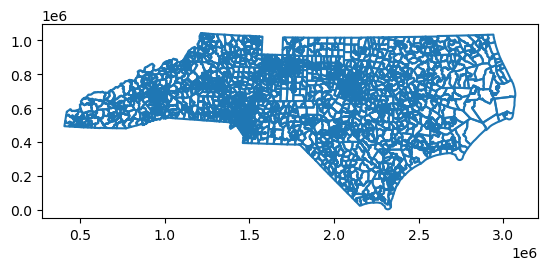

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST.

In [6]:
election_results = pd.read_csv('/Users/admin/Desktop/NC/2020/data/results/results_pct_20201103.txt', sep='\t', lineterminator='\n')

In [7]:
election_results.sort_values(by=['County', 'Precinct','Contest Name']).head(1)

County Election Date Precinct  Contest Group ID Contest Type  \
32933  ALAMANCE    11/03/2020       01                 1            C   

                                 Contest Name    Choice Choice Party  \
32933  ALAMANCE COUNTY BOARD OF COMMISSIONERS  Bob Byrd          DEM   

       Vote For  Election Day  One Stop  Absentee by Mail  Provisional  \
32933         3            92       311               167            1   

       Total Votes Real Precinct  \r  
32933          571             Y  \r

In [8]:
#Read in Sorted precinct files for counties listed by VEST
path = "/Users/admin/Desktop/NC/2020/data/results/temp/pct_sorted/"
  
# csv files in the path
files = glob.glob(path + "/*.txt")
  
# defining an empty list to store 
# content
nc_2020_counties = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    nc_2020_counties = pd.read_csv(filename, sep='\t', lineterminator='\n')
    content.append(nc_2020_counties)
    
# converting content to data frame
df_2020_cnty = pd.concat(content)
#print(df_2020_cnty.shape)
df_2020_cnty.head(1)

county_id     county election_dt result_type_lbl result_type_desc  \
0          3  ALLEGHANY  11/03/2020             STD         <NORMAL>   

   contest_id                            contest_title  contest_party_lbl  \
0         622  ALLEGHANY COUNTY BOARD OF COMMISSIONERS                NaN   

   contest_vote_for precinct_code  \
0                 2            01   

                                                  precinct_name  candidate_id  \
0  CHERRY LANE                                                           1371   

       candidate_name candidate_party_lbl  group_num    group_name  \
0  F.O. (Dale) Caveny                 UNA          1  ELECTION DAY   

  voting_method_lbl voting_method_rslt_desc  vote_ct\r  
0                 V            Election Day         14

In [9]:
#Get counties using Sorted files and remove from state file
counties = df_2020_cnty.county.unique()
df_2020_cnty.columns = ["county_id","County","Election Date","result_type_lbl","result_type_desc","contest_id","Contest Name","Choice Party","contest_vote_for","Precinct","Precinct Name","candidate_id","Choice","Choice Party","group_num","group_name","voting_method","voting method_rslt","Total Votes"]
election_results = election_results[~election_results['County'].isin(counties)]

In [10]:
#Sum precinct votes for candidates
df_2020_cnty = df_2020_cnty.groupby(['County', 'Contest Name', 'Precinct', 'Choice'])["Total Votes"].sum().reset_index()

In [11]:
election_results = pd.concat([election_results,df_2020_cnty], axis=0, ignore_index=True)

In [12]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("/Users/admin/Desktop/PA/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="North Carolina"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
nc_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "37" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [13]:
#Combine Presidential Write In votes
election_results.loc[(election_results['Choice'] == "Write-In (Miscellaneous)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"
election_results.loc[(election_results['Choice'] == "Jade Simmons (Write-In)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"
election_results.loc[(election_results['Choice'] == "Jade Simmons") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"

In [14]:
#Create a list of candidates from the VEST documentation

# List of candidates names from VEST documentation
office_list = ['Donald J. Trump','Joseph R. Biden','Jo Jorgensen','Howie Hawkins','Don Blankenship',"Write-In Votes",'Thom Tillis',
        'Cal Cunningham','Shannon W. Bray','Kevin E. Hayes','Dan Forest','Roy Cooper','Steven J. DiFiore','Al Pisano','Mark Robinson','Yvonne Lewis Holley',"Jim O'Neill",'Josh Stein','Dale R. Folwell','Ronnie Chatterji','E.C. Sykes','Elaine Marshall','Anthony Wayne (Tony) Street','Beth A. Wood','Steve Troxler','Jenna Wadsworth','Mike Causey','Wayne Goodwin','Josh Dobson','Jessica Holmes','Catherine Truitt','Jen Mangrum','Paul Newby','Cheri Beasley','Phil Berger, Jr.','Lucy Inman','Tamara Barringer','Mark Davis','April C. Wood','Tricia Shields','Fred Gore','Lora Christine Cubbage','Chris Dillon','Gray Styers','Jeff Carpenter','Reuben F. Young','Jefferson G. Griffin','Chris Brook']
office_list = sorted(office_list)

contest_list = ['NC ATTORNEY GENERAL', 'NC AUDITOR', 'NC COMMISSIONER OF AGRICULTURE', 'NC COMMISSIONER OF INSURANCE', 'NC COMMISSIONER OF LABOR', 'NC COURT OF APPEALS JUDGE SEAT 04', 'NC COURT OF APPEALS JUDGE SEAT 05', 'NC COURT OF APPEALS JUDGE SEAT 06', 'NC COURT OF APPEALS JUDGE SEAT 07', 'NC COURT OF APPEALS JUDGE SEAT 13', 'NC GOVERNOR', 'NC LIEUTENANT GOVERNOR', 'NC SECRETARY OF STATE', 'NC SUPERINTENDENT OF PUBLIC INSTRUCTION', 'NC SUPREME COURT ASSOCIATE JUSTICE SEAT 02', 'NC SUPREME COURT ASSOCIATE JUSTICE SEAT 04', 'NC SUPREME COURT CHIEF JUSTICE SEAT 01', 'NC TREASURER', 'US PRESIDENT', 'US SENATE']

In [15]:
election_results = election_results[election_results["Choice"].isin(office_list) & election_results["Contest Name"].isin(contest_list)]

In [16]:
election_results["Choice"].unique()

array(['Jen Mangrum', 'Jessica Holmes', 'Chris Dillon', 'Donald J. Trump',
       'Cheri Beasley', 'Paul Newby', 'April C. Wood', 'Josh Stein',
       'Steve Troxler', 'Phil Berger, Jr.', 'Thom Tillis',
       'Jefferson G. Griffin', 'Lucy Inman', 'Cal Cunningham',
       'E.C. Sykes', 'Wayne Goodwin', 'Write-In Votes', 'Kevin E. Hayes',
       'Fred Gore', 'Gray Styers', 'Jeff Carpenter',
       'Anthony Wayne (Tony) Street', 'Tricia Shields', 'Mike Causey',
       'Tamara Barringer', 'Reuben F. Young', 'Howie Hawkins',
       'Ronnie Chatterji', 'Chris Brook', 'Steven J. DiFiore',
       'Josh Dobson', 'Dan Forest', "Jim O'Neill",
       'Lora Christine Cubbage', 'Al Pisano', 'Dale R. Folwell',
       'Jenna Wadsworth', 'Mark Robinson', 'Catherine Truitt',
       'Elaine Marshall', 'Don Blankenship', 'Joseph R. Biden',
       'Roy Cooper', 'Beth A. Wood', 'Mark Davis', 'Jo Jorgensen',
       'Yvonne Lewis Holley', 'Shannon W. Bray'], dtype=object)

In [17]:
#Add FIPS columns
election_results["COUNTYFP10"] = election_results["County"].map(nc_fips_dict).fillna(election_results["County"])
vest_shp["COUNTYFP10"] = vest_shp['COUNTY_NAM'].map(nc_fips_dict).fillna(vest_shp['COUNTY_NAM'])

In [18]:
#Clean up precinct column by stripping the white space
election_results["Precinct"]=election_results["Precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTYFP10"]+election_results["Precinct"]

In [19]:
#Run the pivot
pivoted_election_results = pd.pivot_table(election_results,values=["Total Votes"],index=["pivot_col"],columns=["Choice"],aggfunc=sum)

#Fill in N/A with 0
pivoted_election_results = pivoted_election_results.fillna(0)

#Clean the columns
pivoted_election_results.reset_index(drop=False,inplace=True)
pivoted_election_results.columns = pivoted_election_results.columns.droplevel(0)

In [20]:
pivoted_election_results.head(1)

Choice         Al Pisano  Anthony Wayne (Tony) Street  April C. Wood  \
0       00101         13                         2247           2290   

Choice  Beth A. Wood  Cal Cunningham  Catherine Truitt  Cheri Beasley  \
0                608             564              2301            630   

Choice  Chris Brook  Chris Dillon  Dale R. Folwell  Dan Forest  \
0               568          2296             2240        2209   

Choice  Don Blankenship  Donald J. Trump  E.C. Sykes  Elaine Marshall  \
0                     5             2299        2251              617   

Choice  Fred Gore  Gray Styers  Howie Hawkins  Jeff Carpenter  \
0            2276          548              6            2280   

Choice  Jefferson G. Griffin  Jen Mangrum  Jenna Wadsworth  Jessica Holmes  \
0                       2274          558              485             573   

Choice  Jim O'Neill  Jo Jorgensen  Joseph R. Biden  Josh Dobson  Josh Stein  \
0              2266            27              566         2293         618   

Choice  Kevin E. Hayes  Lora Christine Cubbage  Lucy Inman  Mark Davis  \
0                   51                     571         588         596   

Choice  Mark Robinson  Mike Causey  Paul Newby  Phil Berger, Jr.  \
0                2336         2304        2239              2275   

Choice  Reuben F. Young  Ronnie Chatterji  Roy Cooper  Shannon W. Bray  \
0                   567               611         661               68   

Choice  Steve Troxler  Steven J. DiFiore  Tamara Barringer  Thom Tillis  \
0                2401                 19              2259         2205   

Choice  Tricia Shields  Wayne Goodwin  Write-In Votes  Yvonne Lewis Holley  
0                  566            561               4                  556

In [21]:
pivoted_election_results.columns.values[0] = "join_col"

In [22]:
pivoted_election_results.head(1)

Choice join_col  Al Pisano  Anthony Wayne (Tony) Street  April C. Wood  \
0         00101         13                         2247           2290   

Choice  Beth A. Wood  Cal Cunningham  Catherine Truitt  Cheri Beasley  \
0                608             564              2301            630   

Choice  Chris Brook  Chris Dillon  Dale R. Folwell  Dan Forest  \
0               568          2296             2240        2209   

Choice  Don Blankenship  Donald J. Trump  E.C. Sykes  Elaine Marshall  \
0                     5             2299        2251              617   

Choice  Fred Gore  Gray Styers  Howie Hawkins  Jeff Carpenter  \
0            2276          548              6            2280   

Choice  Jefferson G. Griffin  Jen Mangrum  Jenna Wadsworth  Jessica Holmes  \
0                       2274          558              485             573   

Choice  Jim O'Neill  Jo Jorgensen  Joseph R. Biden  Josh Dobson  Josh Stein  \
0              2266            27              566         2293         618   

Choice  Kevin E. Hayes  Lora Christine Cubbage  Lucy Inman  Mark Davis  \
0                   51                     571         588         596   

Choice  Mark Robinson  Mike Causey  Paul Newby  Phil Berger, Jr.  \
0                2336         2304        2239              2275   

Choice  Reuben F. Young  Ronnie Chatterji  Roy Cooper  Shannon W. Bray  \
0                   567               611         661               68   

Choice  Steve Troxler  Steven J. DiFiore  Tamara Barringer  Thom Tillis  \
0                2401                 19              2259         2205   

Choice  Tricia Shields  Wayne Goodwin  Write-In Votes  Yvonne Lewis Holley  
0                  566            561               4                  556

In [23]:
#Add FIPS State and County columns
pivoted_election_results.insert(loc=0, column='STATEFP10', value='37')
pivoted_election_results.insert(loc=1, column='COUNTYFP10', value=pivoted_election_results['join_col'].str[0:3])
pivoted_election_results.insert(loc=3, column='Precinct', value=pivoted_election_results['join_col'].str[3:])

In [24]:
pivoted_election_results.head(1)

Choice STATEFP10 COUNTYFP10 join_col Precinct  Al Pisano  \
0             37        001    00101       01         13   

Choice  Anthony Wayne (Tony) Street  April C. Wood  Beth A. Wood  \
0                              2247           2290           608   

Choice  Cal Cunningham  Catherine Truitt  Cheri Beasley  Chris Brook  \
0                  564              2301            630          568   

Choice  Chris Dillon  Dale R. Folwell  Dan Forest  Don Blankenship  \
0               2296             2240        2209                5   

Choice  Donald J. Trump  E.C. Sykes  Elaine Marshall  Fred Gore  Gray Styers  \
0                  2299        2251              617       2276          548   

Choice  Howie Hawkins  Jeff Carpenter  Jefferson G. Griffin  Jen Mangrum  \
0                   6            2280                  2274          558   

Choice  Jenna Wadsworth  Jessica Holmes  Jim O'Neill  Jo Jorgensen  \
0                   485             573         2266            27   

Choice  Joseph R. Biden  Josh Dobson  Josh Stein  Kevin E. Hayes  \
0                   566         2293         618              51   

Choice  Lora Christine Cubbage  Lucy Inman  Mark Davis  Mark Robinson  \
0                          571         588         596           2336   

Choice  Mike Causey  Paul Newby  Phil Berger, Jr.  Reuben F. Young  \
0              2304        2239              2275              567   

Choice  Ronnie Chatterji  Roy Cooper  Shannon W. Bray  Steve Troxler  \
0                    611         661               68           2401   

Choice  Steven J. DiFiore  Tamara Barringer  Thom Tillis  Tricia Shields  \
0                      19              2259         2205             566   

Choice  Wayne Goodwin  Write-In Votes  Yvonne Lewis Holley  
0                 561               4                  556

In [25]:
pivoted_election_results.columns = ["STATEFP10","COUNTYFP10","join_col","Precinct","G20GOVCPIS","G20AUDRSTR","G20SACRWOO","G20AUDDWOO","G20USSDCUN","G20SPIRTRU","G20SSCDBEA","G20SACDBRO","G20SACRDIL","G20TRERFOL","G20GOVRFOR","G20PRECBLA","G20PRERTRU","G20SOSRSYK","G20SOSDMAR","G20SACRGOR","G20SACDSTY","G20PREGHAW","G20SACRCAR","G20SACRGRI","G20SPIDMAN","G20AGRDWAD","G20LABDHOL","G20ATGRONE","G20PRELJOR","G20PREDBID","G20LABRDOB","G20ATGDSTE","G20USSCHAY","G20SACDCUB","G20SSCDINM","G20SSCDDAV","G20LTGRROB","G20INSRCAU","G20SSCRNEW","G20SSCRBER","G20SACDYOU","G20TREDCHA","G20GOVDCOO","G20USSLBRA","G20AGRRTRO","G20GOVLDIF","G20SSCRBAR","G20USSRTIL","G20SACDSHI","G20INSDGOO","G20PREOWRI","G20LTGDHOL"]

In [26]:
pivoted_election_results.head(1)

pivoted_election_results = pivoted_election_results.loc[pivoted_election_results['COUNTYFP10'] != '169']

In [27]:
election_results = pivoted_election_results.copy()

## Compare vote totals before allocation

In [28]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20PREOWRI',
 'G20USSRTIL',
 'G20USSDCUN',
 'G20USSLBRA',
 'G20USSCHAY',
 'G20GOVRFOR',
 'G20GOVDCOO',
 'G20GOVLDIF',
 'G20GOVCPIS',
 'G20LTGRROB',
 'G20LTGDHOL',
 'G20ATGRONE',
 'G20ATGDSTE',
 'G20TRERFOL',
 'G20TREDCHA',
 'G20SOSRSYK',
 'G20SOSDMAR',
 'G20AUDRSTR',
 'G20AUDDWOO',
 'G20AGRRTRO',
 'G20AGRDWAD',
 'G20INSRCAU',
 'G20INSDGOO',
 'G20LABRDOB',
 'G20LABDHOL',
 'G20SPIRTRU',
 'G20SPIDMAN',
 'G20SSCRNEW',
 'G20SSCDBEA',
 'G20SSCRBER',
 'G20SSCDINM',
 'G20SSCRBAR',
 'G20SSCDDAV',
 'G20SACRWOO',
 'G20SACDSHI',
 'G20SACRGOR',
 'G20SACDCUB',
 'G20SACRDIL',
 'G20SACDSTY',
 'G20SACRCAR',
 'G20SACDYOU',
 'G20SACRGRI',
 'G20SACDBRO']

In [29]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107194949
107221060


In [30]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating,allocating_to_all_empty_precs=False):
    """Allocates votes proportionally to precincts, usually by share of precinct-reported vote

    Args:
      df_receiving_votes: DataFrame with precinct-level votes
      df_allocating: DataFrame with the votes to allocate
      column_list: List of races that votes are being allocated for
      col_allocating: String referring to what level the allocation occurs at (most often county)
      allocating_to_all_empty_precs: Boolean for special case where all votes in df_receiving_votes are 0

    Returns:
      The precinct-level votes dataframe (df_receiving_votes) with the allocated votes
    """
    
    #Fill any n/a values with 0
    df_receiving_votes = df_receiving_votes.fillna(0)
    #Grab the original columns, so we can filter back down to them later
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    if (allocating_to_all_empty_precs):
        #In cases where every vote is 0, need to set the Total_Votes equal to 1 for proportional allocation
        df_receiving_votes.loc[:,"Total_Votes"]=1
    else:
        df_receiving_votes.loc[:,"Total_Votes"]=0
        for race in column_list:
            df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Add in total sum check
    sum_dataframe = pd.DataFrame(columns=precinct_specific_totals.columns)
    for i in column_list:
        total_votes = precinct_specific_totals.loc[:,i].sum()+to_dole_out_totals.loc[:,i].sum()
        sum_dataframe.at[0,i]=total_votes.astype(int)
    
    #Check the allocating to empty precincts code
    if (allocating_to_all_empty_precs):
        for i in column_list:
            if(sum(precinct_specific_totals[i])!=0):
                print("Allocating to all empty precincts parameter incorrect")
                break
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
                        if(row["Total_Votes"]==0):
                            precinct_specific_totals.loc[index,"Total_Votes"]=1
                            col_val = row[col_allocating]
                            df_receiving_votes.loc[df_receiving_votes[col_allocating]==col_val,"Total_Votes"]=1

    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        df_receiving_votes.loc[:,race] = df_receiving_votes.loc[:,race].astype(int)
        #Check to make sure all the votes have been allocated
        if ((sum_dataframe.loc[:,race].sum()-df_receiving_votes.loc[:,race].sum()!=0)):
            print("Some issue in allocating votes for:", i)
            
    #Filter down to original columns
    df_receiving_votes = df_receiving_votes[original_cols]

    return df_receiving_votes

In [31]:
searchfor = ['ABS', 'PROVISIONAL','ONE STOP','CURBSIDE','TRANS','OS ','OS-',' OS','PROVISIOINAL','OSAP','OSCA','OSCH','OSKD','OSLL','OSLOB','OSNR','OSOP','OSTA','OSWA','PROVI ']
in_sos =  election_results[election_results["Precinct"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()
in_sos

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\846260330.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()


COUNTYFP10  G20GOVCPIS  G20AUDRSTR  G20SACRWOO  G20AUDDWOO  G20USSDCUN  \
0         001           0           0           0           0           0   
1         005           0           0           0           0           0   
2         009           0           0           0           0           0   
3         011           0           0           0           0           0   
4         013           0           0           0           0           0   
5         015           0           5           6          29          29   
6         017           0           0           0           0           0   
7         021           0           0           0           0           0   
8         025           0           0           0           0           0   
9         027           0           0           0           0           0   
10        029           0           0           0           0           0   
11        053           0           0           0           0           0   
12        055           0           0           0           0           0   
13        057           0          34          34          13          15   
14        059           0           0           0           0           0   
15        061           2         198         206         315         297   
16        063          13          61          61         309         301   
17        065           0           0           0           0           0   
18        081           0           0           0           0           0   
19        083           4         252         297        1924        1851   
20        085           0           0           0           0           0   
21        087           0           0           0           0           0   
22        089           0           0           0           0           0   
23        091           0           0           0           0           0   
24        095           0           0           0           0           0   
25        101           0           0           0           0           0   
26        103           0           0           0           0           0   
27        105           0           0           0           0           0   
28        109           0           0           0           0           0   
29        113           0           0           0           0           0   
30        117           1          29          28          41          40   
31        119           0           0           0           0           0   
32        125           0           0           0           0           0   
33        127           0           0           0           0           0   
34        129          10          77          81         116         115   
35        131           0           8           9          26          24   
36        135           0           0           0           0           0   
37        139           0           0           0           0           0   
38        147           6         221         234         386         356   
39        149           0           0           0           0           0   
40        153           0           0           0           0           0   
41        165           0           0           0           0           0   
42        171           7        3238        3349         856         778   
43        177           0          38          44          65          57   
44        183           0           0           0           0           0   
45        187           0           0           0           0           0   
46        189           0           0           0           0           0   
47        191           0           0           0           0           0   
48        193           5         111         113          29          29   
49        197           0           0           0           0           0   

    G20SPIRTRU  G20SSCDBEA  G20SACDBRO  G20SACRDIL  G20TRERFOL  G20GOVRFOR 

In [32]:
election_results = election_results[election_results['Real Precinct']=='Y']
election_results = election_results[~election_results["Precinct"].str.contains('|'.join(searchfor))]
#election_results = allocate_absentee(election_results,in_sos,races,'COUNTYFP10')
election_results.head(1)

STATEFP10 COUNTYFP10 join_col Precinct  G20GOVCPIS  G20AUDRSTR  G20SACRWOO  \
0        37        001    00101       01          13        2247        2290   

   G20AUDDWOO  G20USSDCUN  G20SPIRTRU  G20SSCDBEA  G20SACDBRO  G20SACRDIL  \
0         608         564        2301         630         568        2296   

   G20TRERFOL  G20GOVRFOR  G20PRECBLA  G20PRERTRU  G20SOSRSYK  G20SOSDMAR  \
0        2240        2209           5        2299        2251         617   

   G20SACRGOR  G20SACDSTY  G20PREGHAW  G20SACRCAR  G20SACRGRI  G20SPIDMAN  \
0        2276         548           6        2280        2274         558   

   G20AGRDWAD  G20LABDHOL  G20ATGRONE  G20PRELJOR  G20PREDBID  G20LABRDOB  \
0         485         573        2266          27         566        2293   

   G20ATGDSTE  G20USSCHAY  G20SACDCUB  G20SSCDINM  G20SSCDDAV  G20LTGRROB  \
0         618          51         571         588         596        2336   

   G20INSRCAU  G20SSCRNEW  G20SSCRBER  G20SACDYOU  G20TREDCHA  G20GOVDCOO  \
0        2304        2239        2275         567         611         661   

   G20USSLBRA  G20AGRRTRO  G20GOVLDIF  G20SSCRBAR  G20USSRTIL  G20SACDSHI  \
0          68        2401          19        2259        2205         566   

   G20INSDGOO  G20PREOWRI  G20LTGDHOL  
0         561           4         556

## Compare Election Result Totals

### Compare Vote Totals

In [33]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107194949
107053342


### Compare Race Totals

In [34]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [35]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU has a difference of 4463 votes
	VEST: 2738631 votes
	SOURCES: 2734168 votes
G20PREDBID has a difference of 3782 votes
	VEST: 2679006 votes
	SOURCES: 2675224 votes
G20PRELJOR has a difference of 38 votes
	VEST: 48498 votes
	SOURCES: 48460 votes
G20PREGHAW has a difference of 9 votes
	VEST: 12165 votes
	SOURCES: 12156 votes
G20PRECBLA has a difference of -1225 votes
	VEST: 7520 votes
	SOURCES: 8745 votes
G20PREOWRI has a difference of 1 votes
	VEST: 13281 votes
	SOURCES: 13280 votes
G20USSRTIL has a difference of 4216 votes
	VEST: 2646999 votes
	SOURCES: 2642783 votes
G20USSDCUN has a difference of 3097 votes
	VEST: 2564354 votes
	SOURCES: 2561257 votes
G20USSLBRA has a difference of 172 votes
	VEST: 170759 votes
	SOURCES: 170587 votes
G20USSCHAY has a difference of -381 votes
	VEST: 67360 votes
	SOURCES: 67741 votes
G20GOVRFOR has a difference of 4135 votes
	VEST: 2567755 votes
	SOURCES: 2563620 votes
G20GOVDCOO has a difference of 4082 votes
	VES

## Differences in State Totals 
VEST State totals match official state totals. Our totals are off because of what appears to be an error in the North Carolina "Precinct Sorted Results". In counties where VEST used these files we did as well and the totals do not appear to match.  We assume that VEST did some deallocation that we were not able to do. 

### Compare County Totals

In [36]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [37]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP10')

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	005 has a difference of -1 votes
		VEST: 4527 votes
		SOURCES: 4528 votes
	011 has a difference of 4 votes
		VEST: 7172 votes
		SOURCES: 7168 votes
	015 has a difference of 8 votes
		VEST: 3817 votes
		SOURCES: 3809 votes
	017 has a difference of 9 votes
		VEST: 9676 votes
		SOURCES: 9667 votes
	025 has a difference of -1 votes
		VEST: 63237 votes
		SOURCES: 63238 votes
	027 has a difference of 6 votes
		VEST: 32119 votes
		SOURCES: 32113 votes
	055 has a difference of -1 votes
		VEST: 13938 votes
		SOURCES: 13939 votes
	057 has a difference of 30 votes
		VEST: 64658 votes
		SOURCES: 64628 votes
	061 has a difference of 79 votes
		VEST: 13793 votes
		SOURCES: 13714 votes
	063 has a difference of 47 votes
		VEST: 32459 votes
		SOURCES: 32412 votes
	065 has a difference of -1 votes
		VEST: 9206 votes
		SOURCES: 9207 votes
	081 has a difference of -1 votes
		VEST: 107294 votes
		SOURCES: 107295 votes
	083 h

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will defaul

		VEST: 8767 votes


C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 8667 votes
	063 has a difference of 324 votes
		VEST: 144688 votes
		SOURCES: 144364 votes
	065 has a difference of 2 votes
		VEST: 16089 votes
		SOURCES: 16087 votes
	081 has a difference of -1 votes
		VEST: 173086 votes
		SOURCES: 173087 votes
	083 has a difference of 1890 votes
		VEST: 15545 votes
		SOURCES: 13655 votes
	087 has a difference of 1 votes
		VEST: 13144 votes
		SOURCES: 13143 votes
	089 has a difference of 16 votes
		VEST: 27211 votes
		SOURCES: 27195 votes
	091 has a difference of -15 votes
		VEST: 7097 votes
		SOURCES: 7112 votes
	103 has a difference of 1 votes
		VEST: 2197 votes
		SOURCES: 2196 votes
	113 has a difference of 3 votes
		VEST: 6230 votes
		SOURCES: 6227 votes
	117 has a difference of 37 votes
		VEST: 5911 votes
		SOURCES: 5874 votes
	119 has a difference of 50 votes
		VEST: 378107 votes
		SOURCES: 378057 votes
	129 has a difference of 119 votes
		VEST: 66138 votes
		SOURCES: 66019 votes
	131 has a difference of 26 votes
		VEST: 6069 votes
		

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to Fa

		SOURCES: 39 votes
G20PRECBLA contains differences in these counties:
	005 has a difference of -5 votes
		VEST: 5 votes
		SOURCES: 10 votes
	013 has a difference of -20 votes
		VEST: 37 votes
		SOURCES: 57 votes
	015 has a difference of -2 votes
		VEST: 8 votes
		SOURCES: 10 votes
	017 has a difference of -17 votes
		VEST: 20 votes
		SOURCES: 37 votes
	021 has a difference of -104 votes
		VEST: 225 votes
		SOURCES: 329 votes
	025 has a difference of -21 votes
		VEST: 144 votes
		SOURCES: 165 votes
	027 has a difference of -26 votes
		VEST: 52 votes
		SOURCES: 78 votes
	053 has a difference of -9 votes
		VEST: 24 votes
		SOURCES: 33 votes
	055 has a difference of -24 votes
		VEST: 31 votes
		SOURCES: 55 votes
	057 has a difference of -54 votes
		VEST: 189 votes
		SOURCES: 243 votes
	059 has a difference of -22 votes
		VEST: 32 votes
		SOURCES: 54 votes
	061 has a difference of -10 votes
		VEST: 17 votes
		SOURCES: 27 votes
	063 has a difference of -49 votes
		VEST: 206 votes
		SOURCES:

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will defaul

G20PREOWRI contains differences in these counties:
	011 has a difference of -1 votes
		VEST: 16 votes
		SOURCES: 17 votes
	015 has a difference of 1 votes
		VEST: 7 votes
		SOURCES: 6 votes
	025 has a difference of -1 votes
		VEST: 335 votes
		SOURCES: 336 votes
	053 has a difference of -1 votes
		VEST: 33 votes
		SOURCES: 34 votes
	057 has a difference of 1 votes
		VEST: 141 votes
		SOURCES: 140 votes
	063 has a difference of -4 votes
		VEST: 538 votes
		SOURCES: 542 votes
	081 has a difference of 1 votes
		VEST: 747 votes
		SOURCES: 746 votes
	117 has a difference of 1 votes
		VEST: 9 votes
		SOURCES: 8 votes
	119 has a difference of -1 votes
		VEST: 1934 votes
		SOURCES: 1935 votes
	135 has a difference of -1 votes
		VEST: 275 votes
		SOURCES: 276 votes
	139 has a difference of 1 votes
		VEST: 50 votes
		SOURCES: 49 votes
	147 has a difference of 1 votes
		VEST: 208 votes
		SOURCES: 207 votes
	171 has a difference of 4 votes
		VEST: 57 votes
		SOURCES: 53 votes
G20USSRTIL contains d

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 1587 votes
		SOURCES: 1590 votes
	011 has a difference of -1 votes
		VEST: 2079 votes
		SOURCES: 2080 votes
	013 has a difference of -12 votes
		VEST: 9439 votes
		SOURCES: 9451 votes
	015 has a difference of 30 votes
		VEST: 5825 votes
		SOURCES: 5795 votes
	017 has a difference of -7 votes
		VEST: 7280 votes
		SOURCES: 7287 votes
	021 has a difference of -59 votes
		VEST: 92664 votes
		SOURCES: 92723 votes
	025 has a difference of -11 votes
		VEST: 48886 votes
		SOURCES: 48897 votes
	027 has a difference of -10 votes
		VEST: 10288 votes
		SOURCES: 10298 votes
	053 has a difference of -4 votes
		VEST: 3849 votes
		SOURCES: 3853 votes
	055 has a difference of -14 votes
		VEST: 9284 votes
		SOURCES: 9298 votes
	057 has a difference of -24 votes
		VEST: 23660 votes
		SOURCES: 23684 votes
	059 has a difference of -6 votes
		VEST: 6570 votes
		SOURCES: 6576 votes
	061 has a difference of 95 votes
		VEST: 8689 votes
		SOURCES: 8594 votes
	063 has a difference of 308 votes
		VEST: 13

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Eit

		SOURCES: 4046 votes
G20USSLBRA contains differences in these counties:
	005 has a difference of -1 votes
		VEST: 192 votes
		SOURCES: 193 votes
	015 has a difference of 1 votes
		VEST: 158 votes
		SOURCES: 157 votes
	017 has a difference of 1 votes
		VEST: 399 votes
		SOURCES: 398 votes
	025 has a difference of -1 votes
		VEST: 4261 votes
		SOURCES: 4262 votes
	027 has a difference of 1 votes
		VEST: 1299 votes
		SOURCES: 1298 votes
	061 has a difference of 3 votes
		VEST: 477 votes
		SOURCES: 474 votes
	063 has a difference of 10 votes
		VEST: 5041 votes
		SOURCES: 5031 votes
	065 has a difference of 1 votes
		VEST: 506 votes
		SOURCES: 505 votes
	081 has a difference of -3 votes
		VEST: 8587 votes
		SOURCES: 8590 votes
	083 has a difference of 25 votes
		VEST: 456 votes
		SOURCES: 431 votes
	087 has a difference of -1 votes
		VEST: 1081 votes
		SOURCES: 1082 votes
	089 has a difference of 1 votes
		VEST: 1964 votes
		SOURCES: 1963 votes
	113 has a difference of 1 votes
		VEST: 521 

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 590 votes
	129 has a difference of 1 votes
		VEST: 1685 votes
		SOURCES: 1684 votes
	131 has a difference of -12 votes
		VEST: 99 votes
		SOURCES: 111 votes
	135 has a difference of -26 votes
		VEST: 488 votes
		SOURCES: 514 votes
	147 has a difference of -17 votes
		VEST: 846 votes
		SOURCES: 863 votes
	171 has a difference of 55 votes
		VEST: 531 votes
		SOURCES: 476 votes
	177 has a difference of 1 votes
		VEST: 24 votes
		SOURCES: 23 votes
	183 has a difference of -32 votes
		VEST: 4893 votes
		SOURCES: 4925 votes
	187 has a difference of 4 votes
		VEST: 104 votes
		SOURCES: 100 votes
	189 has a difference of -5 votes
		VEST: 331 votes
		SOURCES: 336 votes
	191 has a difference of -5 votes
		VEST: 823 votes
		SOURCES: 828 votes
	193 has a difference of 2 votes
		VEST: 587 votes
		SOURCES: 585 votes
G20GOVRFOR contains differences in these counties:
	011 has a difference of 2 votes
		VEST: 6894 votes
		SOURCES: 6892 votes
	015 has a difference of 6 votes
		VEST: 3654 vote

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 2623 votes
		SOURCES: 2589 votes
	189 has a difference of -1 votes
		VEST: 13790 votes
		SOURCES: 13791 votes
	193 has a difference of 108 votes
		VEST: 25469 votes
		SOURCES: 25361 votes
	197 has a difference of 1 votes
		VEST: 14910 votes
		SOURCES: 14909 votes
G20GOVDCOO contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1929 votes
		SOURCES: 1927 votes
	011 has a difference of 1 votes
		VEST: 2407 votes
		SOURCES: 2406 votes
	015 has a difference of 33 votes
		VEST: 6080 votes
		SOURCES: 6047 votes
	017 has a difference of 6 votes
		VEST: 7784 votes
		SOURCES: 7778 votes
	021 has a difference of -1 votes
		VEST: 99395 votes
		SOURCES: 99396 votes
	025 has a difference of 4 votes
		VEST: 54665 votes
		SOURCES: 54661 votes
	027 has a difference of 1 votes
		VEST: 11926 votes
		SOURCES: 11925 votes
	053 has a difference of 1 votes
		VEST: 4382 votes
		SOURCES: 4381 votes
	057 has a difference of 12 votes
		VEST: 26598 votes
		SOURCES: 26586 votes


C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 8146 votes
	125 has a difference of 1 votes
		VEST: 610 votes
		SOURCES: 609 votes
	135 has a difference of 1 votes
		VEST: 787 votes
		SOURCES: 786 votes
	147 has a difference of 3 votes
		VEST: 898 votes
		SOURCES: 895 votes
	165 has a difference of 1 votes
		VEST: 94 votes
		SOURCES: 93 votes
	171 has a difference of 23 votes
		VEST: 265 votes
		SOURCES: 242 votes
	177 has a difference of 2 votes
		VEST: 9 votes
		SOURCES: 7 votes
	187 has a difference of 2 votes
		VEST: 24 votes
		SOURCES: 22 votes
	193 has a difference of 1 votes
		VEST: 250 votes
		SOURCES: 249 votes
G20GOVCPIS contains differences in these counties:
	005 has a difference of -2 votes
		VEST: 23 votes
		SOURCES: 25 votes
	013 has a difference of -26 votes
		VEST: 79 votes
		SOURCES: 105 votes
	017 has a difference of -13 votes
		VEST: 48 votes
		SOURCES: 61 votes
	021 has a difference of -91 votes
		VEST: 622 votes
		SOURCES: 713 votes
	025 has a difference of -15 votes
		VEST: 506 votes
		SOURCES: 521 

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 224 votes
		SOURCES: 247 votes
	193 has a difference of -8 votes
		VEST: 94 votes
		SOURCES: 102 votes
	197 has a difference of -20 votes
		VEST: 54 votes
		SOURCES: 74 votes
G20LTGRROB contains differences in these counties:
	011 has a difference of 3 votes
		VEST: 7137 votes
		SOURCES: 7134 votes
	013 has a difference of -2 votes
		VEST: 16469 votes
		SOURCES: 16471 votes
	015 has a difference of 3 votes
		VEST: 3765 votes
		SOURCES: 3762 votes
	017 has a difference of 3 votes
		VEST: 9552 votes
		SOURCES: 9549 votes
	021 has a difference of -26 votes
		VEST: 63817 votes
		SOURCES: 63843 votes
	025 has a difference of -4 votes
		VEST: 64355 votes
		SOURCES: 64359 votes
	027 has a difference of 3 votes
		VEST: 31829 votes
		SOURCES: 31826 votes
	055 has a difference of -3 votes
		VEST: 13796 votes
		SOURCES: 13799 votes
	057 has a difference of 29 votes
		VEST: 65206 votes
		SOURCES: 65177 votes
	061 has a difference of 67 votes
		VEST: 13726 votes
		SOURCES: 13659 votes
	063 

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 1534 votes
	011 has a difference of -1 votes
		VEST: 2081 votes
		SOURCES: 2082 votes
	015 has a difference of 30 votes
		VEST: 5839 votes
		SOURCES: 5809 votes
	017 has a difference of 3 votes
		VEST: 7189 votes
		SOURCES: 7186 votes
	021 has a difference of -3 votes
		VEST: 94564 votes
		SOURCES: 94567 votes
	025 has a difference of 4 votes
		VEST: 50666 votes
		SOURCES: 50662 votes
	027 has a difference of 1 votes
		VEST: 10181 votes
		SOURCES: 10180 votes
	053 has a difference of 1 votes
		VEST: 4022 votes
		SOURCES: 4021 votes
	057 has a difference of 4 votes
		VEST: 22689 votes
		SOURCES: 22685 votes
	061 has a difference of 91 votes
		VEST: 8551 votes
		SOURCES: 8460 votes
	063 has a difference of 319 votes
		VEST: 141908 votes
		SOURCES: 141589 votes
	065 has a difference of 1 votes
		VEST: 16073 votes
		SOURCES: 16072 votes
	081 has a difference of 2 votes
		VEST: 168772 votes
		SOURCES: 168770 votes
	083 has a difference of 1857 votes
		VEST: 15414 votes
		SOURCES:

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 13136 votes
		SOURCES: 13073 votes
	063 has a difference of 3 votes
		VEST: 34005 votes
		SOURCES: 34002 votes
	065 has a difference of -12 votes
		VEST: 8446 votes
		SOURCES: 8458 votes
	081 has a difference of -116 votes
		VEST: 106199 votes
		SOURCES: 106315 votes
	083 has a difference of 260 votes
		VEST: 9395 votes
		SOURCES: 9135 votes
	087 has a difference of -9 votes
		VEST: 22160 votes
		SOURCES: 22169 votes
	089 has a difference of 12 votes
		VEST: 40401 votes
		SOURCES: 40389 votes
	095 has a difference of -5 votes
		VEST: 1314 votes
		SOURCES: 1319 votes
	103 has a difference of -7 votes
		VEST: 3126 votes
		SOURCES: 3133 votes
	113 has a difference of -2 votes
		VEST: 13778 votes
		SOURCES: 13780 votes
	117 has a difference of 29 votes
		VEST: 6068 votes
		SOURCES: 6039 votes
	119 has a difference of -121 votes
		VEST: 186985 votes
		SOURCES: 187106 votes
	125 has a difference of 1 votes
		VEST: 35954 votes
		SOURCES: 35953 votes
	127 has a difference of -5 votes
	

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 172997 votes
	083 has a difference of 1884 votes
		VEST: 15870 votes
		SOURCES: 13986 votes
	087 has a difference of -19 votes
		VEST: 13835 votes
		SOURCES: 13854 votes
	089 has a difference of -6 votes
		VEST: 26933 votes
		SOURCES: 26939 votes
	091 has a difference of 2 votes
		VEST: 6985 votes
		SOURCES: 6983 votes
	095 has a difference of -7 votes
		VEST: 1111 votes
		SOURCES: 1118 votes
	103 has a difference of -3 votes
		VEST: 2277 votes
		SOURCES: 2280 votes
	105 has a difference of -3 votes
		VEST: 12908 votes
		SOURCES: 12911 votes
	109 has a difference of -11 votes
		VEST: 14201 votes
		SOURCES: 14212 votes
	113 has a difference of -19 votes
		VEST: 6537 votes
		SOURCES: 6556 votes
	117 has a difference of 39 votes
		VEST: 6225 votes
		SOURCES: 6186 votes
	119 has a difference of -25 votes
		VEST: 369137 votes
		SOURCES: 369162 votes
	125 has a difference of -14 votes
		VEST: 20790 votes
		SOURCES: 20804 votes
	127 has a difference of -4 votes
		VEST: 27284 votes


C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 39392 votes
	065 has a difference of -10 votes
		VEST: 9327 votes
		SOURCES: 9337 votes
	081 has a difference of -116 votes
		VEST: 111080 votes
		SOURCES: 111196 votes
	083 has a difference of 328 votes
		VEST: 9985 votes
		SOURCES: 9657 votes
	087 has a difference of -7 votes
		VEST: 22750 votes
		SOURCES: 22757 votes
	089 has a difference of 11 votes
		VEST: 41543 votes
		SOURCES: 41532 votes
	091 has a difference of 1 votes
		VEST: 3503 votes
		SOURCES: 3502 votes
	095 has a difference of -1 votes
		VEST: 1354 votes
		SOURCES: 1355 votes
	103 has a difference of -4 votes
		VEST: 3205 votes
		SOURCES: 3209 votes
	113 has a difference of 3 votes
		VEST: 13864 votes
		SOURCES: 13861 votes
	117 has a difference of 26 votes
		VEST: 6257 votes
		SOURCES: 6231 votes
	119 has a difference of -86 votes
		VEST: 206365 votes
		SOURCES: 206451 votes
	125 has a difference of -4 votes
		VEST: 36829 votes
		SOURCES: 36833 votes
	127 has a difference of -7 votes
		VEST: 26125 votes
		SO

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 25103 votes
	091 has a difference of 1 votes
		VEST: 6722 votes
		SOURCES: 6721 votes
	095 has a difference of -9 votes
		VEST: 1042 votes
		SOURCES: 1051 votes
	103 has a difference of -5 votes
		VEST: 2171 votes
		SOURCES: 2176 votes
	105 has a difference of -5 votes
		VEST: 11699 votes
		SOURCES: 11704 votes
	109 has a difference of -5 votes
		VEST: 12597 votes
		SOURCES: 12602 votes
	113 has a difference of -20 votes
		VEST: 6150 votes
		SOURCES: 6170 votes
	117 has a difference of 39 votes
		VEST: 5954 votes
		SOURCES: 5915 votes
	119 has a difference of -35 votes
		VEST: 342923 votes
		SOURCES: 342958 votes
	125 has a difference of -15 votes
		VEST: 19009 votes
		SOURCES: 19024 votes
	127 has a difference of -4 votes
		VEST: 25106 votes
		SOURCES: 25110 votes
	129 has a difference of 96 votes
		VEST: 60610 votes
		SOURCES: 60514 votes
	131 has a difference of 16 votes
		VEST: 5953 votes
		SOURCES: 5937 votes
	135 has a difference of -12 votes
		VEST: 59455 votes
		SOUR

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 8952 votes
	087 has a difference of -17 votes
		VEST: 21654 votes
		SOURCES: 21671 votes
	089 has a difference of 7 votes
		VEST: 39701 votes
		SOURCES: 39694 votes
	095 has a difference of -4 votes
		VEST: 1230 votes
		SOURCES: 1234 votes
	103 has a difference of -3 votes
		VEST: 3041 votes
		SOURCES: 3044 votes
	109 has a difference of -1 votes
		VEST: 34459 votes
		SOURCES: 34460 votes
	113 has a difference of -1 votes
		VEST: 13457 votes
		SOURCES: 13458 votes
	117 has a difference of 29 votes
		VEST: 5764 votes
		SOURCES: 5735 votes
	119 has a difference of -126 votes
		VEST: 182318 votes
		SOURCES: 182444 votes
	125 has a difference of -2 votes
		VEST: 35210 votes
		SOURCES: 35212 votes
	127 has a difference of -5 votes
		VEST: 23876 votes
		SOURCES: 23881 votes
	129 has a difference of 61 votes
		VEST: 60529 votes
		SOURCES: 60468 votes
	131 has a difference of 3 votes
		VEST: 3619 votes
		SOURCES: 3616 votes
	135 has a difference of -33 votes
		VEST: 20071 votes
		SO

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 9413 votes
		SOURCES: 9316 votes
	063 has a difference of 326 votes
		VEST: 143943 votes
		SOURCES: 143617 votes
	065 has a difference of 3 votes
		VEST: 16897 votes
		SOURCES: 16894 votes
	081 has a difference of -48 votes
		VEST: 174671 votes
		SOURCES: 174719 votes
	083 has a difference of 1905 votes
		VEST: 16185 votes
		SOURCES: 14280 votes
	087 has a difference of -21 votes
		VEST: 14172 votes
		SOURCES: 14193 votes
	089 has a difference of -11 votes
		VEST: 27305 votes
		SOURCES: 27316 votes
	095 has a difference of -6 votes
		VEST: 1192 votes
		SOURCES: 1198 votes
	103 has a difference of -2 votes
		VEST: 2371 votes
		SOURCES: 2373 votes
	105 has a difference of -6 votes
		VEST: 13692 votes
		SOURCES: 13698 votes
	109 has a difference of -11 votes
		VEST: 14377 votes
		SOURCES: 14388 votes
	113 has a difference of -18 votes
		VEST: 6730 votes
		SOURCES: 6748 votes
	117 has a difference of 43 votes
		VEST: 6512 votes
		SOURCES: 6469 votes
	119 has a difference of -11 vot

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 8877 votes
	021 has a difference of -31 votes
		VEST: 60542 votes
		SOURCES: 60573 votes
	025 has a difference of -1 votes
		VEST: 61095 votes
		SOURCES: 61096 votes
	027 has a difference of 6 votes
		VEST: 30575 votes
		SOURCES: 30569 votes
	055 has a difference of -10 votes
		VEST: 13045 votes
		SOURCES: 13055 votes
	057 has a difference of 18 votes
		VEST: 62446 votes
		SOURCES: 62428 votes
	059 has a difference of -3 votes
		VEST: 17690 votes
		SOURCES: 17693 votes
	061 has a difference of 67 votes
		VEST: 12797 votes
		SOURCES: 12730 votes
	063 has a difference of 1 votes
		VEST: 32661 votes
		SOURCES: 32660 votes
	065 has a difference of -23 votes
		VEST: 7613 votes
		SOURCES: 7636 votes
	081 has a difference of -126 votes
		VEST: 103059 votes
		SOURCES: 103185 votes
	083 has a difference of 235 votes
		VEST: 9042 votes
		SOURCES: 8807 votes
	087 has a difference of -10 votes
		VEST: 21828 votes
		SOURCES: 21838 votes
	089 has a difference of 13 votes
		VEST: 39829 vot

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 7674 votes
		SOURCES: 7671 votes
	021 has a difference of -53 votes
		VEST: 96041 votes
		SOURCES: 96094 votes
	025 has a difference of -7 votes
		VEST: 52450 votes
		SOURCES: 52457 votes
	027 has a difference of -8 votes
		VEST: 11040 votes
		SOURCES: 11048 votes
	053 has a difference of -2 votes
		VEST: 4349 votes
		SOURCES: 4351 votes
	055 has a difference of -14 votes
		VEST: 9899 votes
		SOURCES: 9913 votes
	057 has a difference of -33 votes
		VEST: 24848 votes
		SOURCES: 24881 votes
	059 has a difference of -13 votes
		VEST: 7123 votes
		SOURCES: 7136 votes
	061 has a difference of 97 votes
		VEST: 9211 votes
		SOURCES: 9114 votes
	063 has a difference of 311 votes
		VEST: 143483 votes
		SOURCES: 143172 votes
	081 has a difference of -42 votes
		VEST: 173273 votes
		SOURCES: 173315 votes
	083 has a difference of 1917 votes
		VEST: 16305 votes
		SOURCES: 14388 votes
	087 has a difference of -34 votes
		VEST: 13920 votes
		SOURCES: 13954 votes
	089 has a difference of -3 vo

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 65342 votes
	027 has a difference of 7 votes
		VEST: 32038 votes
		SOURCES: 32031 votes
	055 has a difference of -8 votes
		VEST: 13715 votes
		SOURCES: 13723 votes
	057 has a difference of 25 votes
		VEST: 67070 votes
		SOURCES: 67045 votes
	061 has a difference of 67 votes
		VEST: 13844 votes
		SOURCES: 13777 votes
	063 has a difference of 14 votes
		VEST: 40953 votes
		SOURCES: 40939 votes
	065 has a difference of -21 votes
		VEST: 9441 votes
		SOURCES: 9462 votes
	081 has a difference of -119 votes
		VEST: 120688 votes
		SOURCES: 120807 votes
	083 has a difference of 313 votes
		VEST: 10222 votes
		SOURCES: 9909 votes
	087 has a difference of -10 votes
		VEST: 23957 votes
		SOURCES: 23967 votes
	089 has a difference of 12 votes
		VEST: 42203 votes
		SOURCES: 42191 votes
	091 has a difference of 1 votes
		VEST: 3447 votes
		SOURCES: 3446 votes
	095 has a difference of -1 votes
		VEST: 1458 votes
		SOURCES: 1459 votes
	103 has a difference of -3 votes
		VEST: 3291 votes
		

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 8236 votes
	063 has a difference of 295 votes
		VEST: 134906 votes
		SOURCES: 134611 votes
	065 has a difference of -2 votes
		VEST: 15688 votes
		SOURCES: 15690 votes
	081 has a difference of -64 votes
		VEST: 157827 votes
		SOURCES: 157891 votes
	083 has a difference of 1844 votes
		VEST: 15167 votes
		SOURCES: 13323 votes
	087 has a difference of -40 votes
		VEST: 12039 votes
		SOURCES: 12079 votes
	089 has a difference of -14 votes
		VEST: 24809 votes
		SOURCES: 24823 votes
	091 has a difference of -1 votes
		VEST: 6877 votes
		SOURCES: 6878 votes
	095 has a difference of -9 votes
		VEST: 966 votes
		SOURCES: 975 votes
	103 has a difference of -8 votes
		VEST: 2124 votes
		SOURCES: 2132 votes
	105 has a difference of -6 votes
		VEST: 11047 votes
		SOURCES: 11053 votes
	109 has a difference of -11 votes
		VEST: 12622 votes
		SOURCES: 12633 votes
	113 has a difference of -14 votes
		VEST: 5997 votes
		SOURCES: 6011 votes
	117 has a difference of 41 votes
		VEST: 5647 votes

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 62999 votes
		SOURCES: 63042 votes
	025 has a difference of -8 votes
		VEST: 63485 votes
		SOURCES: 63493 votes
	027 has a difference of 8 votes
		VEST: 31342 votes
		SOURCES: 31334 votes
	055 has a difference of -6 votes
		VEST: 13488 votes
		SOURCES: 13494 votes
	057 has a difference of 25 votes
		VEST: 64753 votes
		SOURCES: 64728 votes
	061 has a difference of 72 votes
		VEST: 13447 votes
		SOURCES: 13375 votes
	063 has a difference of 14 votes
		VEST: 36606 votes
		SOURCES: 36592 votes
	065 has a difference of -18 votes
		VEST: 8802 votes
		SOURCES: 8820 votes
	081 has a difference of -123 votes
		VEST: 110952 votes
		SOURCES: 111075 votes
	083 has a difference of 277 votes
		VEST: 9626 votes
		SOURCES: 9349 votes
	087 has a difference of -10 votes
		VEST: 22640 votes
		SOURCES: 22650 votes
	089 has a difference of 7 votes
		VEST: 41049 votes
		SOURCES: 41042 votes
	091 has a difference of 1 votes
		VEST: 3268 votes
		SOURCES: 3267 votes
	095 has a difference of -1 votes
	

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 2188 votes
		SOURCES: 2187 votes
	113 has a difference of 4 votes
		VEST: 6206 votes
		SOURCES: 6202 votes
	117 has a difference of 39 votes
		VEST: 6014 votes
		SOURCES: 5975 votes
	119 has a difference of 40 votes
		VEST: 352076 votes
		SOURCES: 352036 votes
	129 has a difference of 116 votes
		VEST: 61407 votes
		SOURCES: 61291 votes
	131 has a difference of 25 votes
		VEST: 6094 votes
		SOURCES: 6069 votes
	135 has a difference of 2 votes
		VEST: 60640 votes
		SOURCES: 60638 votes
	139 has a difference of 1 votes
		VEST: 9841 votes
		SOURCES: 9840 votes
	147 has a difference of 373 votes
		VEST: 46132 votes
		SOURCES: 45759 votes
	171 has a difference of 759 votes
		VEST: 8925 votes
		SOURCES: 8166 votes
	177 has a difference of 62 votes
		VEST: 789 votes
		SOURCES: 727 votes
	187 has a difference of -22 votes
		VEST: 3459 votes
		SOURCES: 3481 votes
	193 has a difference of 27 votes
		VEST: 7610 votes
		SOURCES: 7583 votes
G20LABRDOB contains differences in these counties:

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 959 votes
		SOURCES: 919 votes
	183 has a difference of -38 votes
		VEST: 234033 votes
		SOURCES: 234071 votes
	187 has a difference of 33 votes
		VEST: 2647 votes
		SOURCES: 2614 votes
	189 has a difference of -3 votes
		VEST: 14459 votes
		SOURCES: 14462 votes
	191 has a difference of -3 votes
		VEST: 29993 votes
		SOURCES: 29996 votes
	193 has a difference of 116 votes
		VEST: 26618 votes
		SOURCES: 26502 votes
	197 has a difference of -2 votes
		VEST: 15581 votes
		SOURCES: 15583 votes
G20LABDHOL contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1594 votes
		SOURCES: 1592 votes
	013 has a difference of -20 votes
		VEST: 9840 votes
		SOURCES: 9860 votes
	015 has a difference of 31 votes
		VEST: 5964 votes
		SOURCES: 5933 votes
	017 has a difference of -1 votes
		VEST: 7487 votes
		SOURCES: 7488 votes
	021 has a difference of -61 votes
		VEST: 94451 votes
		SOURCES: 94512 votes
	025 has a difference of -7 votes
		VEST: 50740 votes
		SOURCES: 507

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 4474 votes
		SOURCES: 4478 votes
	171 has a difference of 767 votes
		VEST: 9108 votes
		SOURCES: 8341 votes
	177 has a difference of 61 votes
		VEST: 780 votes
		SOURCES: 719 votes
	183 has a difference of -49 votes
		VEST: 377012 votes
		SOURCES: 377061 votes
	187 has a difference of -26 votes
		VEST: 3429 votes
		SOURCES: 3455 votes
	189 has a difference of -4 votes
		VEST: 16277 votes
		SOURCES: 16281 votes
	191 has a difference of -16 votes
		VEST: 24254 votes
		SOURCES: 24270 votes
	193 has a difference of 15 votes
		VEST: 7781 votes
		SOURCES: 7766 votes
	197 has a difference of -19 votes
		VEST: 3894 votes
		SOURCES: 3913 votes
G20SPIRTRU contains differences in these counties:
	011 has a difference of 3 votes
		VEST: 6997 votes
		SOURCES: 6994 votes
	013 has a difference of -3 votes
		VEST: 16064 votes
		SOURCES: 16067 votes
	015 has a difference of 6 votes
		VEST: 3648 votes
		SOURCES: 3642 votes
	017 has a difference of 6 votes
		VEST: 9203 votes
		SOURCES: 9197 vote

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 940 votes
	183 has a difference of -37 votes
		VEST: 236259 votes
		SOURCES: 236296 votes
	187 has a difference of 32 votes
		VEST: 2702 votes
		SOURCES: 2670 votes
	189 has a difference of -7 votes
		VEST: 14382 votes
		SOURCES: 14389 votes
	191 has a difference of -4 votes
		VEST: 30363 votes
		SOURCES: 30367 votes
	193 has a difference of 115 votes
		VEST: 26672 votes
		SOURCES: 26557 votes
G20SPIDMAN contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1575 votes
		SOURCES: 1573 votes
	011 has a difference of -1 votes
		VEST: 2086 votes
		SOURCES: 2087 votes
	013 has a difference of -19 votes
		VEST: 9523 votes
		SOURCES: 9542 votes
	015 has a difference of 28 votes
		VEST: 5851 votes
		SOURCES: 5823 votes
	017 has a difference of -3 votes
		VEST: 7301 votes
		SOURCES: 7304 votes
	021 has a difference of -58 votes
		VEST: 93613 votes
		SOURCES: 93671 votes
	025 has a difference of -11 votes
		VEST: 50325 votes
		SOURCES: 50336 votes
	027 has a

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 9062 votes
		SOURCES: 8256 votes
	177 has a difference of 63 votes
		VEST: 749 votes
		SOURCES: 686 votes
	183 has a difference of -32 votes
		VEST: 373437 votes
		SOURCES: 373469 votes
	187 has a difference of -23 votes
		VEST: 3357 votes
		SOURCES: 3380 votes
	189 has a difference of 1 votes
		VEST: 16336 votes
		SOURCES: 16335 votes
	191 has a difference of -14 votes
		VEST: 23783 votes
		SOURCES: 23797 votes
	193 has a difference of 22 votes
		VEST: 7654 votes
		SOURCES: 7632 votes
	197 has a difference of -22 votes
		VEST: 3871 votes
		SOURCES: 3893 votes
G20SSCRNEW contains differences in these counties:
	011 has a difference of 1 votes
		VEST: 6884 votes
		SOURCES: 6883 votes
	013 has a difference of -9 votes
		VEST: 15828 votes
		SOURCES: 15837 votes
	015 has a difference of 1 votes
		VEST: 3644 votes
		SOURCES: 3643 votes
	017 has a difference of -1 votes
		VEST: 8889 votes
		SOURCES: 8890 votes
	021 has a difference of -38 votes
		VEST: 62355 votes
		SOURCES: 62393 vo

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 2624 votes
	189 has a difference of -5 votes
		VEST: 14222 votes
		SOURCES: 14227 votes
	191 has a difference of -4 votes
		VEST: 29655 votes
		SOURCES: 29659 votes
	193 has a difference of 107 votes
		VEST: 26100 votes
		SOURCES: 25993 votes
	197 has a difference of 3 votes
		VEST: 15328 votes
		SOURCES: 15325 votes
G20SSCDBEA contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1727 votes
		SOURCES: 1725 votes
	011 has a difference of 1 votes
		VEST: 2266 votes
		SOURCES: 2265 votes
	013 has a difference of -18 votes
		VEST: 9917 votes
		SOURCES: 9935 votes
	015 has a difference of 28 votes
		VEST: 5884 votes
		SOURCES: 5856 votes
	017 has a difference of -7 votes
		VEST: 7723 votes
		SOURCES: 7730 votes
	021 has a difference of -56 votes
		VEST: 95120 votes
		SOURCES: 95176 votes
	025 has a difference of -18 votes
		VEST: 51772 votes
		SOURCES: 51790 votes
	027 has a difference of -12 votes
		VEST: 11266 votes
		SOURCES: 11278 votes
	029 has a 

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 4563 votes
		SOURCES: 4564 votes
	165 has a difference of 1 votes
		VEST: 7455 votes
		SOURCES: 7454 votes
	171 has a difference of 851 votes
		VEST: 9849 votes
		SOURCES: 8998 votes
	177 has a difference of 58 votes
		VEST: 789 votes
		SOURCES: 731 votes
	183 has a difference of -51 votes
		VEST: 381772 votes
		SOURCES: 381823 votes
	187 has a difference of -28 votes
		VEST: 3426 votes
		SOURCES: 3454 votes
	189 has a difference of -5 votes
		VEST: 16774 votes
		SOURCES: 16779 votes
	191 has a difference of -9 votes
		VEST: 24699 votes
		SOURCES: 24708 votes
	193 has a difference of 18 votes
		VEST: 8460 votes
		SOURCES: 8442 votes
	197 has a difference of -17 votes
		VEST: 4236 votes
		SOURCES: 4253 votes
G20SSCRBER contains differences in these counties:
	011 has a difference of 3 votes
		VEST: 7004 votes
		SOURCES: 7001 votes
	013 has a difference of -6 votes
		VEST: 15987 votes
		SOURCES: 15993 votes
	015 has a difference of 5 votes
		VEST: 3657 votes
		SOURCES: 3652 votes

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 23378 votes
	177 has a difference of 41 votes
		VEST: 964 votes
		SOURCES: 923 votes
	183 has a difference of -25 votes
		VEST: 231180 votes
		SOURCES: 231205 votes
	187 has a difference of 31 votes
		VEST: 2671 votes
		SOURCES: 2640 votes
	189 has a difference of -5 votes
		VEST: 14345 votes
		SOURCES: 14350 votes
	191 has a difference of -4 votes
		VEST: 30180 votes
		SOURCES: 30184 votes
	193 has a difference of 113 votes
		VEST: 26509 votes
		SOURCES: 26396 votes
G20SSCDINM contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1602 votes
		SOURCES: 1600 votes
	011 has a difference of -1 votes
		VEST: 2096 votes
		SOURCES: 2097 votes
	013 has a difference of -11 votes
		VEST: 9559 votes
		SOURCES: 9570 votes
	015 has a difference of 31 votes
		VEST: 5845 votes
		SOURCES: 5814 votes
	017 has a difference of -2 votes
		VEST: 7379 votes
		SOURCES: 7381 votes
	021 has a difference of -62 votes
		VEST: 94979 votes
		SOURCES: 95041 votes
	025 has a di

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 64675 votes
	131 has a difference of 20 votes
		VEST: 6115 votes
		SOURCES: 6095 votes
	135 has a difference of -31 votes
		VEST: 62080 votes
		SOURCES: 62111 votes
	139 has a difference of 2 votes
		VEST: 9828 votes
		SOURCES: 9826 votes
	147 has a difference of 333 votes
		VEST: 46799 votes
		SOURCES: 46466 votes
	149 has a difference of -3 votes
		VEST: 4518 votes
		SOURCES: 4521 votes
	171 has a difference of 800 votes
		VEST: 9287 votes
		SOURCES: 8487 votes
	177 has a difference of 62 votes
		VEST: 764 votes
		SOURCES: 702 votes
	183 has a difference of -54 votes
		VEST: 382986 votes
		SOURCES: 383040 votes
	187 has a difference of -22 votes
		VEST: 3367 votes
		SOURCES: 3389 votes
	189 has a difference of -8 votes
		VEST: 16466 votes
		SOURCES: 16474 votes
	191 has a difference of -7 votes
		VEST: 24059 votes
		SOURCES: 24066 votes
	193 has a difference of 13 votes
		VEST: 7951 votes
		SOURCES: 7938 votes
	197 has a difference of -28 votes
		VEST: 3983 votes
		SOURCES

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 10852 votes
		SOURCES: 10855 votes
	165 has a difference of 1 votes
		VEST: 6893 votes
		SOURCES: 6892 votes
	171 has a difference of 3301 votes
		VEST: 26393 votes
		SOURCES: 23092 votes
	177 has a difference of 41 votes
		VEST: 912 votes
		SOURCES: 871 votes
	183 has a difference of -38 votes
		VEST: 241465 votes
		SOURCES: 241503 votes
	187 has a difference of 34 votes
		VEST: 2566 votes
		SOURCES: 2532 votes
	189 has a difference of -5 votes
		VEST: 14651 votes
		SOURCES: 14656 votes
	191 has a difference of -3 votes
		VEST: 29967 votes
		SOURCES: 29970 votes
	193 has a difference of 114 votes
		VEST: 26305 votes
		SOURCES: 26191 votes
	197 has a difference of -1 votes
		VEST: 15286 votes
		SOURCES: 15287 votes
G20SSCDDAV contains differences in these counties:
	005 has a difference of 3 votes
		VEST: 1661 votes
		SOURCES: 1658 votes
	011 has a difference of -1 votes
		VEST: 2027 votes
		SOURCES: 2028 votes
	013 has a difference of -13 votes
		VEST: 9718 votes
		SOURCES: 97

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 60920 votes
		SOURCES: 60947 votes
	147 has a difference of 340 votes
		VEST: 47047 votes
		SOURCES: 46707 votes
	149 has a difference of -4 votes
		VEST: 4475 votes
		SOURCES: 4479 votes
	153 has a difference of -3 votes
		VEST: 8932 votes
		SOURCES: 8935 votes
	165 has a difference of 1 votes
		VEST: 7274 votes
		SOURCES: 7273 votes
	171 has a difference of 807 votes
		VEST: 9483 votes
		SOURCES: 8676 votes
	177 has a difference of 60 votes
		VEST: 802 votes
		SOURCES: 742 votes
	183 has a difference of -42 votes
		VEST: 371307 votes
		SOURCES: 371349 votes
	187 has a difference of -25 votes
		VEST: 3450 votes
		SOURCES: 3475 votes
	189 has a difference of 1 votes
		VEST: 16002 votes
		SOURCES: 16001 votes
	191 has a difference of -12 votes
		VEST: 24134 votes
		SOURCES: 24146 votes
	193 has a difference of 10 votes
		VEST: 8047 votes
		SOURCES: 8037 votes
	197 has a difference of -29 votes
		VEST: 4150 votes
		SOURCES: 4179 votes
G20SACRWOO contains differences in these coun

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 26955 votes
		SOURCES: 23603 votes
	177 has a difference of 44 votes
		VEST: 959 votes
		SOURCES: 915 votes
	183 has a difference of -48 votes
		VEST: 241060 votes
		SOURCES: 241108 votes
	187 has a difference of 29 votes
		VEST: 2714 votes
		SOURCES: 2685 votes
	189 has a difference of -9 votes
		VEST: 14609 votes
		SOURCES: 14618 votes
	191 has a difference of -2 votes
		VEST: 30346 votes
		SOURCES: 30348 votes
	193 has a difference of 115 votes
		VEST: 26627 votes
		SOURCES: 26512 votes
G20SACDSHI contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1541 votes
		SOURCES: 1539 votes
	011 has a difference of -1 votes
		VEST: 2036 votes
		SOURCES: 2037 votes
	013 has a difference of -14 votes
		VEST: 9349 votes
		SOURCES: 9363 votes
	015 has a difference of 29 votes
		VEST: 5800 votes
		SOURCES: 5771 votes
	017 has a difference of 3 votes
		VEST: 7267 votes
		SOURCES: 7264 votes
	021 has a difference of -58 votes
		VEST: 92653 votes
		SOURCES: 92711 

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 369677 votes
	187 has a difference of -19 votes
		VEST: 3298 votes
		SOURCES: 3317 votes
	189 has a difference of -4 votes
		VEST: 15912 votes
		SOURCES: 15916 votes
	191 has a difference of -15 votes
		VEST: 23596 votes
		SOURCES: 23611 votes
	193 has a difference of 12 votes
		VEST: 7630 votes
		SOURCES: 7618 votes
	197 has a difference of -25 votes
		VEST: 3766 votes
		SOURCES: 3791 votes
G20SACRGOR contains differences in these counties:
	011 has a difference of 2 votes
		VEST: 6922 votes
		SOURCES: 6920 votes
	013 has a difference of -7 votes
		VEST: 15943 votes
		SOURCES: 15950 votes
	015 has a difference of 5 votes
		VEST: 3607 votes
		SOURCES: 3602 votes
	017 has a difference of 3 votes
		VEST: 9454 votes
		SOURCES: 9451 votes
	021 has a difference of -48 votes
		VEST: 62508 votes
		SOURCES: 62556 votes
	025 has a difference of -2 votes
		VEST: 62995 votes
		SOURCES: 62997 votes
	027 has a difference of 11 votes
		VEST: 31098 votes
		SOURCES: 31087 votes
	055 has a d

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 236771 votes
	187 has a difference of 34 votes
		VEST: 2666 votes
		SOURCES: 2632 votes
	189 has a difference of -5 votes
		VEST: 14377 votes
		SOURCES: 14382 votes
	191 has a difference of -3 votes
		VEST: 30032 votes
		SOURCES: 30035 votes
	193 has a difference of 115 votes
		VEST: 26482 votes
		SOURCES: 26367 votes
	197 has a difference of -2 votes
		VEST: 15536 votes
		SOURCES: 15538 votes
G20SACDCUB contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1561 votes
		SOURCES: 1559 votes
	011 has a difference of -1 votes
		VEST: 2082 votes
		SOURCES: 2083 votes
	013 has a difference of -12 votes
		VEST: 9417 votes
		SOURCES: 9429 votes
	015 has a difference of 28 votes
		VEST: 5803 votes
		SOURCES: 5775 votes
	017 has a difference of 4 votes
		VEST: 7036 votes
		SOURCES: 7032 votes
	021 has a difference of -55 votes
		VEST: 93851 votes
		SOURCES: 93906 votes
	025 has a difference of -18 votes
		VEST: 50159 votes
		SOURCES: 50177 votes
	027 has a 

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 8241 votes
	177 has a difference of 58 votes
		VEST: 751 votes
		SOURCES: 693 votes
	183 has a difference of -34 votes
		VEST: 373706 votes
		SOURCES: 373740 votes
	187 has a difference of -23 votes
		VEST: 3328 votes
		SOURCES: 3351 votes
	189 has a difference of -4 votes
		VEST: 16056 votes
		SOURCES: 16060 votes
	191 has a difference of -13 votes
		VEST: 23816 votes
		SOURCES: 23829 votes
	193 has a difference of 14 votes
		VEST: 7706 votes
		SOURCES: 7692 votes
	197 has a difference of -24 votes
		VEST: 3821 votes
		SOURCES: 3845 votes
G20SACRDIL contains differences in these counties:
	011 has a difference of 4 votes
		VEST: 6973 votes
		SOURCES: 6969 votes
	013 has a difference of -4 votes
		VEST: 16076 votes
		SOURCES: 16080 votes
	015 has a difference of 5 votes
		VEST: 3614 votes
		SOURCES: 3609 votes
	017 has a difference of 5 votes
		VEST: 9180 votes
		SOURCES: 9175 votes
	021 has a difference of -37 votes
		VEST: 63520 votes
		SOURCES: 63557 votes
	025 has a diff

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 2640 votes
	189 has a difference of -8 votes
		VEST: 14458 votes
		SOURCES: 14466 votes
	191 has a difference of -2 votes
		VEST: 30250 votes
		SOURCES: 30252 votes
	193 has a difference of 112 votes
		VEST: 26604 votes
		SOURCES: 26492 votes
	197 has a difference of -1 votes
		VEST: 15567 votes
		SOURCES: 15568 votes
G20SACDSTY contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1527 votes
		SOURCES: 1525 votes
	011 has a difference of -2 votes
		VEST: 2014 votes
		SOURCES: 2016 votes
	013 has a difference of -22 votes
		VEST: 9254 votes
		SOURCES: 9276 votes
	015 has a difference of 28 votes
		VEST: 5756 votes
		SOURCES: 5728 votes
	017 has a difference of -1 votes
		VEST: 7210 votes
		SOURCES: 7211 votes
	021 has a difference of -54 votes
		VEST: 92674 votes
		SOURCES: 92728 votes
	025 has a difference of -8 votes
		VEST: 49206 votes
		SOURCES: 49214 votes
	027 has a difference of -21 votes
		VEST: 10017 votes
		SOURCES: 10038 votes
	029 has a

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 4372 votes
		SOURCES: 4376 votes
	153 has a difference of -4 votes
		VEST: 8644 votes
		SOURCES: 8648 votes
	171 has a difference of 749 votes
		VEST: 8895 votes
		SOURCES: 8146 votes
	177 has a difference of 57 votes
		VEST: 725 votes
		SOURCES: 668 votes
	183 has a difference of -39 votes
		VEST: 365703 votes
		SOURCES: 365742 votes
	187 has a difference of -18 votes
		VEST: 3317 votes
		SOURCES: 3335 votes
	189 has a difference of 1 votes
		VEST: 15895 votes
		SOURCES: 15894 votes
	191 has a difference of -12 votes
		VEST: 23542 votes
		SOURCES: 23554 votes
	193 has a difference of 9 votes
		VEST: 7542 votes
		SOURCES: 7533 votes
	197 has a difference of -16 votes
		VEST: 3775 votes
		SOURCES: 3791 votes
G20SACRCAR contains differences in these counties:
	011 has a difference of 3 votes
		VEST: 6969 votes
		SOURCES: 6966 votes
	013 has a difference of -5 votes
		VEST: 16028 votes
		SOURCES: 16033 votes
	015 has a difference of 4 votes
		VEST: 3614 votes
		SOURCES: 3610 votes

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 236117 votes
		SOURCES: 236169 votes
	187 has a difference of 34 votes
		VEST: 2674 votes
		SOURCES: 2640 votes
	189 has a difference of -5 votes
		VEST: 14400 votes
		SOURCES: 14405 votes
	191 has a difference of -2 votes
		VEST: 30092 votes
		SOURCES: 30094 votes
	193 has a difference of 112 votes
		VEST: 26625 votes
		SOURCES: 26513 votes
G20SACDYOU contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1499 votes
		SOURCES: 1497 votes
	011 has a difference of 1 votes
		VEST: 2029 votes
		SOURCES: 2028 votes
	013 has a difference of -14 votes
		VEST: 9290 votes
		SOURCES: 9304 votes
	015 has a difference of 29 votes
		VEST: 5768 votes
		SOURCES: 5739 votes
	021 has a difference of -42 votes
		VEST: 93508 votes
		SOURCES: 93550 votes
	025 has a difference of -13 votes
		VEST: 49701 votes
		SOURCES: 49714 votes
	027 has a difference of -14 votes
		VEST: 9991 votes
		SOURCES: 10005 votes
	029 has a difference of 1 votes
		VEST: 1486 votes
		SOURCES: 14

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		VEST: 7049 votes
		SOURCES: 7048 votes
	171 has a difference of 742 votes
		VEST: 8800 votes
		SOURCES: 8058 votes
	177 has a difference of 57 votes
		VEST: 741 votes
		SOURCES: 684 votes
	183 has a difference of -31 votes
		VEST: 372286 votes
		SOURCES: 372317 votes
	187 has a difference of -23 votes
		VEST: 3319 votes
		SOURCES: 3342 votes
	191 has a difference of -13 votes
		VEST: 23656 votes
		SOURCES: 23669 votes
	193 has a difference of 12 votes
		VEST: 7524 votes
		SOURCES: 7512 votes
	197 has a difference of -22 votes
		VEST: 3685 votes
		SOURCES: 3707 votes
G20SACRGRI contains differences in these counties:
	011 has a difference of 3 votes
		VEST: 6949 votes
		SOURCES: 6946 votes
	013 has a difference of -10 votes
		VEST: 15903 votes
		SOURCES: 15913 votes
	015 has a difference of 4 votes
		VEST: 3565 votes
		SOURCES: 3561 votes
	017 has a difference of 8 votes
		VEST: 9102 votes
		SOURCES: 9094 votes
	021 has a difference of -28 votes
		VEST: 62131 votes
		SOURCES: 62159 vo

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

		SOURCES: 9471 votes
	147 has a difference of 192 votes
		VEST: 38230 votes
		SOURCES: 38038 votes
	153 has a difference of -2 votes
		VEST: 10801 votes
		SOURCES: 10803 votes
	171 has a difference of 3318 votes
		VEST: 26614 votes
		SOURCES: 23296 votes
	177 has a difference of 45 votes
		VEST: 961 votes
		SOURCES: 916 votes
	183 has a difference of -34 votes
		VEST: 235592 votes
		SOURCES: 235626 votes
	187 has a difference of 32 votes
		VEST: 2638 votes
		SOURCES: 2606 votes
	189 has a difference of -4 votes
		VEST: 14295 votes
		SOURCES: 14299 votes
	191 has a difference of -4 votes
		VEST: 29842 votes
		SOURCES: 29846 votes
	193 has a difference of 112 votes
		VEST: 26378 votes
		SOURCES: 26266 votes
	197 has a difference of -1 votes
		VEST: 15442 votes
		SOURCES: 15443 votes
G20SACDBRO contains differences in these counties:
	005 has a difference of 2 votes
		VEST: 1558 votes
		SOURCES: 1556 votes
	011 has a difference of 1 votes
		VEST: 2034 votes
		SOURCES: 2033 votes
	013 has

C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
C:\Users\admin\AppData\Local\Temp\ipykernel_3600\1732535120.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Ei

## Attempt to Join

In [38]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP10']+vest_shp['PREC_ID']

In [39]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

2731
2731
2644
2644


In [40]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [41]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PREC_ID"])
print(len(empty_precincts))

0


In [42]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

87


## Attempt Join

In [43]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2644
left_only       87
right_only       0
Name: _merge, dtype: int64


In [44]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','Precinct','G20PRERTRU_x','COUNTYFP10_y','PREC_ID','join_col']]

COUNTYFP10_x                  Precinct  G20PRERTRU_x COUNTYFP10_y  \
130           017        BAY TREE FIRE DEPT             0          NaN   
131           017           BLAD COUNTY GYM             0          NaN   
132           017        BOOK T. WASHINGTON             0          NaN   
133           017              EAST ARCADIA             0          NaN   
151           017          SPAULDING MONROE             0          NaN   
152           017         TAR HEEL MUNI BLD             0          NaN   
258           021                      AVML             0          NaN   
259           021                      AVOM             0          NaN   
260           021                      BMBL             0          NaN   
261           021                      BTFD             0          NaN   
262           021                      ECBL             0          NaN   
263           021                      FVCC             0          NaN   
264           021                      HACC             0          NaN   
265           021                      LECC             0          NaN   
266           021                      LSKY             0          NaN   
267           021                      REYV             0          NaN   
268           021                      SBBL             0          NaN   
269           021                      TCRK             0          NaN   
270           021                      UNCA             0          NaN   
271           021                      WACC             0          NaN   
272           021                      WGSC             0          NaN   
273           021                      WVTH             0          NaN   
817           065    DET OF SOCIAL SERVICES             0          NaN   
818           065  PINES CHAP FELLSHIP HALL             0          NaN   
819           065                 TARBORO 1             0          NaN   
1166          081                  ONE-STOP             0          NaN   
1285          091                BOE OFFICE             0          NaN   
1293          091              MURFREE CNTR             0          NaN   
1361          101              ARCHER LODGE             0          NaN   
1362          101                    BENSON             0          NaN   
1363          101                   CLAYTON             0          NaN   
1364          101                 CLEVELAND             0          NaN   
1401          101                PROVIDENCE             0          NaN   
1402          101                     SELMA             0          NaN   
1403          101                SMITHFIELD             0          NaN   
2053          153                   BROWDER             0          NaN   
2054          153                     CO OP             0          NaN   
2055          153                   ELLERBE             0          NaN   
2056          153                    HAMLET             0          NaN   
2541          183                 OSAB 1-40             0          NaN   
2542          183              OSAB 121-128             0          NaN   
2543          183                OSAB 41-80             0          NaN   
2544          183               OSAB 81-120             0          NaN   
2545          183                 OSAV 1-40             0          NaN   
2546          183              OSAV 121-128             0          NaN   
2547          183                OSAV 41-80             0          NaN   
2548          183               OSAV 81-120             0          NaN   
2549          183                 OSBR 1-40             0          NaN   
2550          183              OSBR 121-128             0          NaN   
2551          183                OSBR 41-80             0          NaN   
2552          183               OSBR 81-120             0          NaN   
2553          183                 OSCM 1-40             0          NaN   
2554          183              OSCM 121-128             0          NaN   
2555     

### Compare Precinct Votes

In [45]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [46]:
precinct_votes_check(join_attempt_one[join_attempt_one["_merge"]=="both"],races,False,'PREC_ID')

G20PRECBLA .....................................................................001 (S) ....4  (V)....3 (D):    1
G20PRECBLA .....................................................................002 (S) ....7  (V)....6 (D):    1
G20GOVCPIS .....................................................................002 (S) ...10  (V)....9 (D):    1
G20ATGRONE .....................................................................002 (S) ..714  (V)..713 (D):    1
G20SOSRSYK .....................................................................002 (S) ..661  (V)..660 (D):    1
G20SACRGOR .....................................................................002 (S) ..716  (V)..715 (D):    1
G20USSCHAY .....................................................................003 (S) ...27  (V)...26 (D):    1
G20GOVCPIS .....................................................................003 (S) ....9  (V)....8 (D):    1
G20PRECBLA .....................................................................004 (S) 

## Differences in Precinct totals  
  
There are a number of differences in the Precinct Totals. This is most likely due to the fact that VEST used precinct-sorted data for 39 counties.

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the North Carolina State Board of Elections: SBE_PRECINCTS_20170519.zip from  
source-https://dl.ncsbe.gov/?prefix=PrecinctMaps/ https://www.ncsbe.gov/results-data/voting-maps-redistricting

### Precinct Shapefiles

In [47]:
shapefiles_nc = gp.read_file('/Users/admin/Desktop/NC/2020/map/SBE_PRECINCTS_20201018/SBE_PRECINCTS_20201018.shp')

In [48]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_nc = shapefiles_nc.to_crs(3857)

In [49]:
shapefiles_nc.head(1)

id prec_id   enr_desc county_nam of_prec_id  county_id blockid  \
0  1988      01  PATTERSON   ALAMANCE       None          1    None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

<AxesSubplot: >

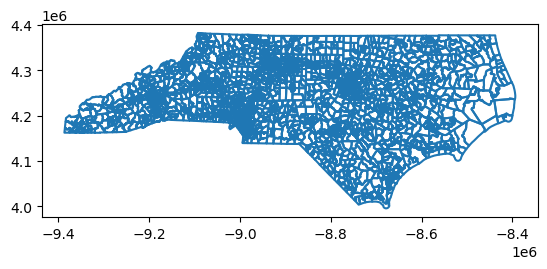

In [50]:
shapefiles_nc.boundary.plot()

In [51]:
print(shapefiles_nc.shape)
vest_shp.shape

(2658, 8)


(2644, 55)

<AxesSubplot: >

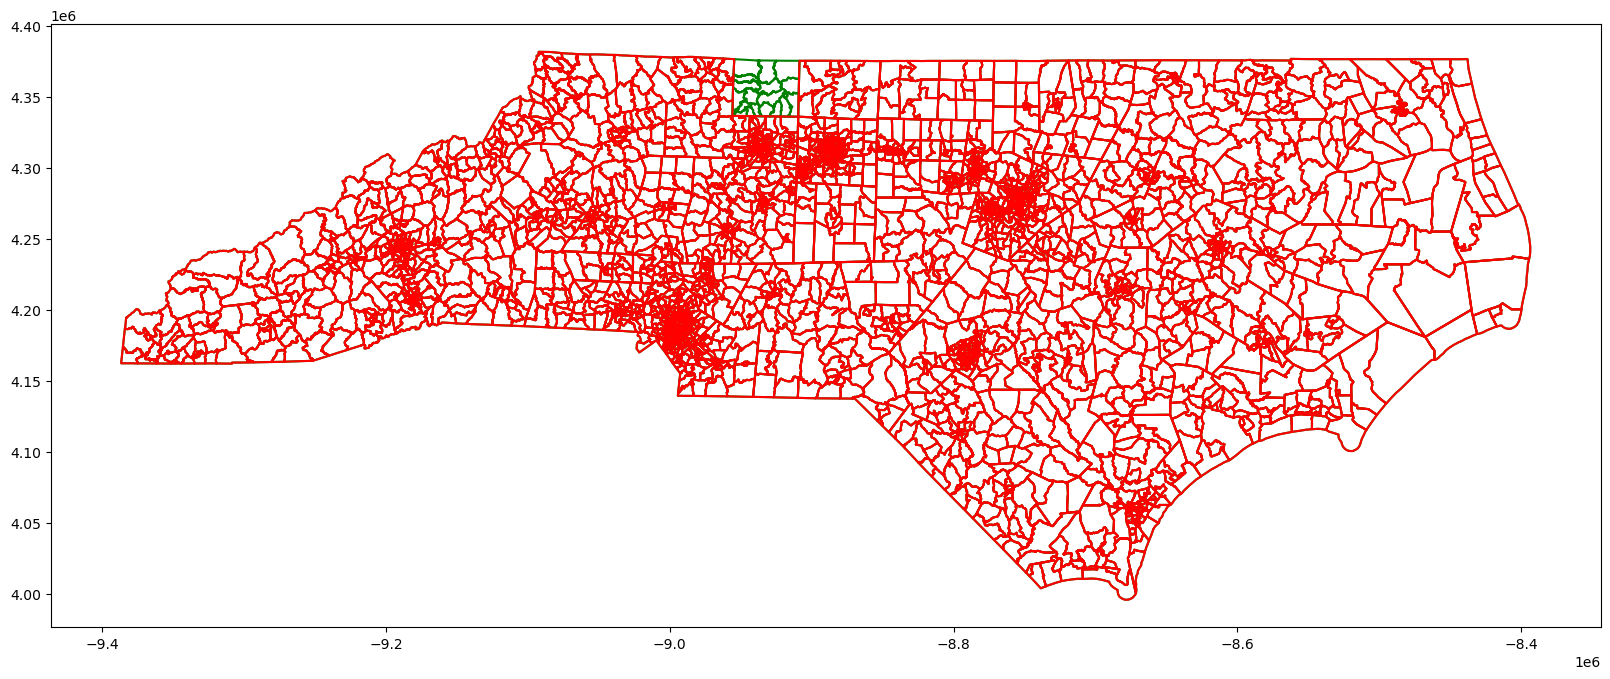

In [52]:
ax = shapefiles_nc.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [53]:
shapefiles_nc["COUNTYFP10"] = shapefiles_nc["county_nam"].map(nc_fips_dict).fillna(shapefiles_nc["county_nam"])

In [54]:
shapefiles_nc["join_col"]=shapefiles_nc['COUNTYFP10']+shapefiles_nc['prec_id']

### Add in precincts from 2019 shapefile

VEST- Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

In [55]:
shapefiles_nc_2019 = gp.read_file('/Users/admin/Desktop/NC/2020/map/SBE_PRECINCTS_20190827/PRECINCTS_20190827.shp')

In [56]:
shapefiles_nc_2019["COUNTYFP10"] = shapefiles_nc_2019["county_nam"].map(nc_fips_dict).fillna(shapefiles_nc_2019["county_nam"])

In [57]:
shapefiles_nc_2019["join_col"]=shapefiles_nc_2019['COUNTYFP10']+shapefiles_nc_2019['prec_id']

In [58]:
precs = ['021681','089CV','18301-07A','18307-07A']
missing_precs = shapefiles_nc_2019.loc[shapefiles_nc_2019['join_col'].isin(precs)]

In [59]:
shapefiles_nc = pd.concat([shapefiles_nc, missing_precs], axis=0)

ValueError: Cannot determine common CRS for concatenation inputs, got ['NAD83 / North Carolina (ftUS)', 'WGS 84 / Pseudo-Mercator']. Use `to_crs()` to transform geometries to the same CRS before merging.

In [ ]:
join_attempt_one = pd.merge(shapefiles_nc,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

In [ ]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','prec_id','COUNTYFP10_y','Precinct','join_col']]

In [ ]:
shapefiles_nc_comp = join_attempt_one[join_attempt_one['_merge'] == 'both']

In [ ]:
final_merge = pd.merge(shapefiles_nc_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

In [ ]:
final_merge[final_merge["final_merge"] != 'both'][['COUNTYFP10_x','prec_id','COUNTYFP10_y','Precinct','join_col']]

In [ ]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")